# Lecture 7 – Data 100, Spring 2025

Data 100, Spring 2025

[Acknowledgments Page](https://ds100.org/sp25/acks/)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In this lecture, we will explore various visualization techniques using the World Bank dataset. This dataset encompasses a wide range of information about countries and their development statistics, including economic indicators, health metrics, and demographic data. By visualizing this data, we can understand patterns that are not immediately apparent from raw data alone. We will use libraries such as `matplotlib`, `seaborn`, and `pandas` to create different types of plots, including bar plots, histograms, box plots, and kernel density estimates. These visualizations will help us better understand the distribution and relationships within the dataset.

In [2]:
wb = pd.read_csv("data/world_bank.csv", index_col=0)
wb.head()

,Continent,Country,Primary completion rate: Male: % of relevant age group: 2015,Primary completion rate: Female: % of relevant age group: 2015,Lower secondary completion rate: Male: % of relevant age group: 2015,Lower secondary completion rate: Female: % of relevant age group: 2015,Youth literacy rate: Male: % of ages 15-24: 2005-14,Youth literacy rate: Female: % of ages 15-24: 2005-14,Adult literacy rate: Male: % ages 15 and older: 2005-14,Adult literacy rate: Female: % ages 15 and older: 2005-14,...,Access to improved sanitation facilities: % of population: 1990,Access to improved sanitation facilities: % of population: 2015,Child immunization rate: Measles: % of children ages 12-23 months: 2015,Child immunization rate: DTP3: % of children ages 12-23 months: 2015,Children with acute respiratory infection taken to health provider: % of children under age 5 with ARI: 2009-2016,Children with diarrhea who received oral rehydration and continuous feeding: % of children under age 5 with diarrhea: 2009-2016,Children sleeping under treated bed nets: % of children under age 5: 2009-2016,Children with fever receiving antimalarial drugs: % of children under age 5 with fever: 2009-2016,Tuberculosis: Treatment success rate: % of new cases: 2014,Tuberculosis: Cases detection rate: % of new estimated cases: 2015
0,Africa,Algeria,106.0,105.0,68.0,85.0,96.0,92.0,83.0,68.0,...,80.0,88.0,95.0,95.0,66.0,42.0,NaN,NaN,88.0,80.0
1,Africa,Angola,NaN,NaN,NaN,NaN,79.0,67.0,82.0,60.0,...,22.0,52.0,55.0,64.0,NaN,NaN,25.9,28.3,34.0,64.0
2,Africa,Benin,83.0,73.0,50.0,37.0,55.0,31.0,41.0,18.0,...,7.0,20.0,75.0,79.0,23.0,33.0,72.7,25.9,89.0,61.0
3,Africa,Botswana,98.0,101.0,86.0,87.0,96.0,99.0,87.0,89.0,...,39.0,63.0,97.0,95.0,NaN,NaN,NaN,NaN,77.0,62.0
5,Africa,Burundi,58.0,66.0,35.0,30.0,90.0,88.0,89.0,85.0,...,42.0,48.0,93.0,94.0,55.0,43.0,53.8,25.4,91.0,51.0


## Bar Plots

Bar plots are a fundamental visualization tool used to display the **distribution** of a **categorical variable**. They are particularly useful for comparing the frequency or count of different categories within a dataset.

In the examples below, we will plot the distribution of the `Continent` column from our World Bank dataset. This will help us understand how many countries belong to each continent. 

To achieve this, we use the `.value_counts()` method, which counts the occurrences of each unique value in the `Continent` column. The resulting counts can then be visualized using various plotting libraries such as `matplotlib`, `seaborn`, and `pandas`.

The cell below demonstrates how to use `.value_counts()` to determine the number of countries corresponding to each continent in the dataset.

In [3]:
wb["Continent"].value_counts()

Continent
Africa        47
Europe        43
Asia          34
N. America    18
Oceania       13
S. America    11
Name: count, dtype: int64

In Data 8, you used the `datascience` library to generate plots. The code to plot the distribution of the `"Maternal Smoker"` column may have looked like this:
```python

from datascience import Table
t = Table.from_df(wb["Continent"].value_counts().reset_index())
t.barh("index", "Continent")
```

### Bar plot using `matplotlib`
In Data 100, we will use the [Matplotlib](https://matplotlib.org/stable/api/index) and [Seaborn](https://seaborn.pydata.org/api.html) plotting libraries to create visualizations. 

First, let's generate a bar plot using the `matplotlib` function `plt.bar`. Bar plots are useful for comparing the frequency or count of different categories within a dataset. In this example, we will visualize the distribution of countries across different continents.

We will use the `value_counts()` method to count the occurrences of each unique value in the `Continent` column of our World Bank dataset. Then, we will plot these counts using `plt.bar`. Remember to set the axis labels and the title for the plot to make it informative and easy to understand.

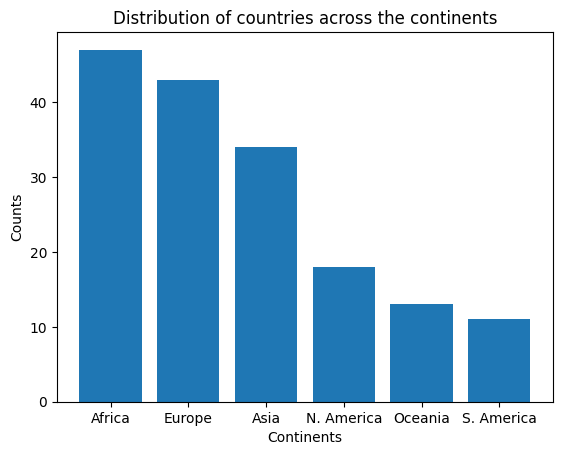

In [99]:
# Count the number of countries in each continent
continents = wb["Continent"].value_counts()

# Create a bar plot for the distribution of countries across the continents
plt.bar(continents.index, continents.values)

# Set the x-axis label
plt.xlabel("Continents")

# Set the y-axis label
plt.ylabel("Counts")

# Set the title of the plot
plt.title("Distribution of countries across the continents");

Note that we concluded our call to `plt.bar` with a semicolon (`;`). This suppresses any unnecessary output other than the plot. If we do not include a semicolon, the plot will still generate. However, we will see extraneous text as well.


### `pandas` native bar plot
The `pandas` library is a powerful tool for data manipulation and analysis. This example will show you how to use `pandas`' native plotting capabilities to create informative bar charts.

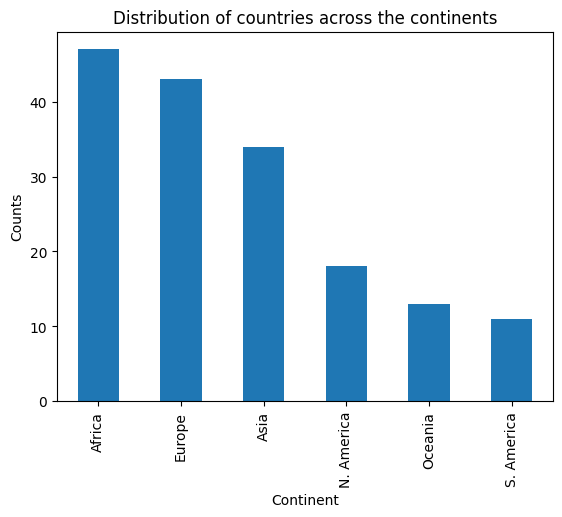

In [5]:
wb["Continent"].value_counts().plot(kind='bar')
plt.ylabel("Counts")
plt.title("Distribution of countries across the continents");

### Bar plot using `seaborn`

Equivalently, we could use the `countplot` method of the `seaborn` library to create our bar plot. The `countplot` function is particularly useful for visualizing the distribution of categorical data. It automatically counts the occurrences of each unique value in the specified column and creates a bar for each category.

In the example below, we will use `sns.countplot` to visualize the distribution of countries across different continents. This will help us understand how many countries belong to each continent in our World Bank dataset.

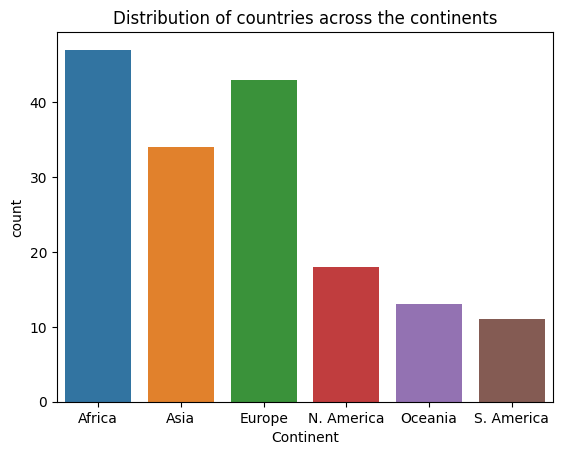

In [6]:
# Create a count plot for the 'Continent' column in the World Bank dataset
sns.countplot(data=wb,x='Continent',hue='Continent')

# Set the title of the plot
plt.title("Distribution of countries across the continents");

Earlier, we mentioned that bar plots are best suited for visualizing the distribution of qualitative (categorical) variables. But why is that the case? Let's explore this concept further by examining what happens when we attempt to use `sns.countplot` to visualize a quantitative variable, such as gross national income per capita.

Quantitative variables represent numerical data that can take on a wide range of values. When we try to use a bar plot to visualize a quantitative variable, we lose the ability to effectively convey the distribution of the data. Instead of meaningful categories, we end up with a bar for each unique value, which can be overwhelming and uninformative.

Let's see an example of how using `sns.countplot` for a quantitative variable can lead to misleading or cluttered visualizations.

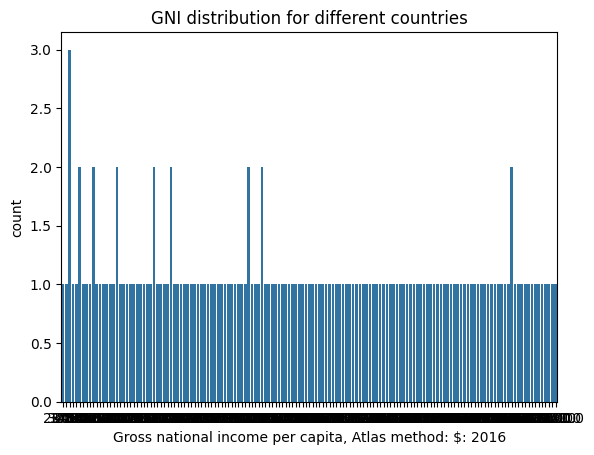

In [7]:
sns.countplot(data=wb, x='Gross national income per capita, Atlas method: $: 2016')
plt.title("GNI distribution for different countries");

What happened? A bar plot (either `plt.bar` or `sns.countplot`) creates a separate bar for each unique value of a variable. With a continuous variable, there may be an infinite number of possible values, leading to a situation where many bars are needed to display each unique value.

To visualize the distribution of a continuous variable, we use different types of plots:
* Histogram
* Box plot
* Violin plot

## Box Plots and Violin Plots

Box plots and violin plots are two very similar kinds of visualizations that display the distribution of a variable using information about quartiles.

### Box Plots
In a box plot:
- The box represents the interquartile range (IQR), which contains the middle 50% of the data.
- The line inside the box represents the median (Q2).
- The "whiskers" extend to the smallest and largest values within 1.5 times the IQR from the lower and upper quartiles (Q1 and Q3).
- Points outside this range are considered outliers and are plotted individually.

### Violin Plots
In a violin plot:
- The width of the plot at any point indicates the *density* of the distribution at each possible value.
- It combines aspects of a box plot with a kernel density plot.
- The thicker sections of the violin indicate a higher density of data points at that value.

Both plots are useful for comparing distributions across different categories. For example, we can use these plots to compare the distribution of Gross National Income per capita across different continents in our World Bank dataset.

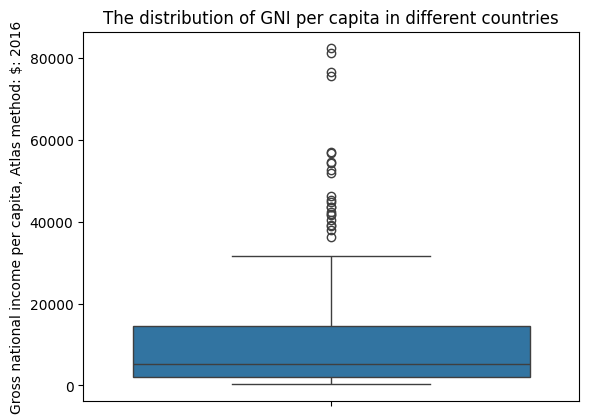

In [8]:
sns.boxplot(data=wb, y="Gross national income per capita, Atlas method: $: 2016")
plt.title("The distribution of GNI per capita in different countries");

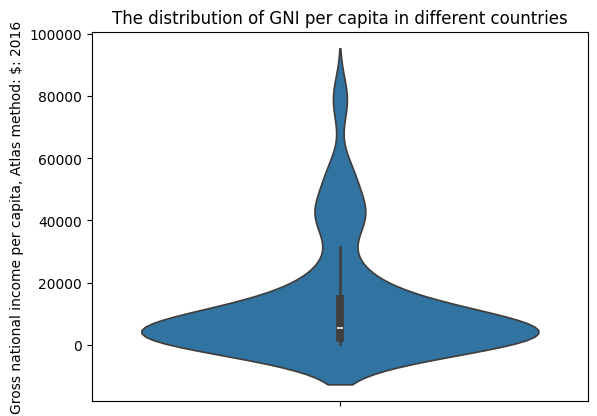

In [9]:
sns.violinplot(data=wb, y="Gross national income per capita, Atlas method: $: 2016")
plt.title("The distribution of GNI per capita in different countries");

A quartile represents a 25% portion of the data. Specifically:
* The first quartile (Q1) represents the 25th percentile, meaning 25% of the data lies below this point.
* The second quartile (Q2), also known as the median, represents the 50th percentile, meaning 50% of the data lies below this point.
* The third quartile (Q3) represents the 75th percentile, meaning 75% of the data lies below this point.

Thus, the middle 50% of the data lies between the first and third quartiles. This concept is illustrated in the histogram below, where the three quartiles are marked with red vertical bars.

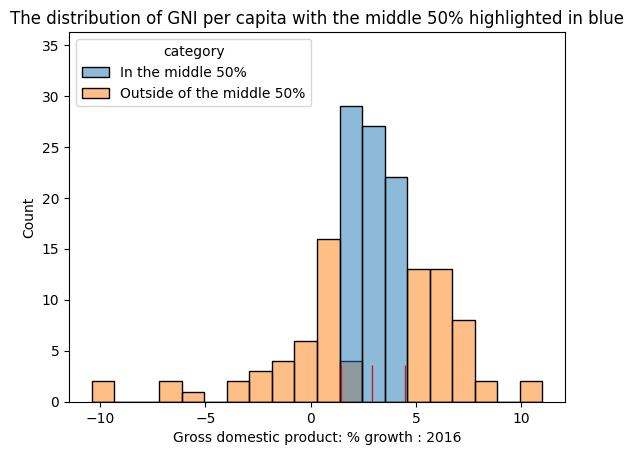

In [10]:
gdp = wb['Gross domestic product: % growth : 2016']
gdp = gdp[~gdp.isna()]

q1, q2, q3 = np.percentile(gdp, [25, 50, 75])

wb_quartiles = wb.copy()
wb_quartiles['category'] = None
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] < q1) | (wb_quartiles['Gross domestic product: % growth : 2016'] > q3), 'category'] = 'Outside of the middle 50%'
wb_quartiles.loc[(wb_quartiles['Gross domestic product: % growth : 2016'] > q1) & (wb_quartiles['Gross domestic product: % growth : 2016'] < q3), 'category'] = 'In the middle 50%'

sns.histplot(wb_quartiles, x="Gross domestic product: % growth : 2016", hue="category")
sns.rugplot([q1, q2, q3], c="firebrick", lw=6, height=0.1)
plt.title("The distribution of GNI per capita with the middle 50% highlighted in blue");

In a box plot, the lower extent of the box lies at Q1, while the upper extent of the box lies at Q3. The horizontal line in the middle of the box corresponds to Q2 (equivalently, the median).

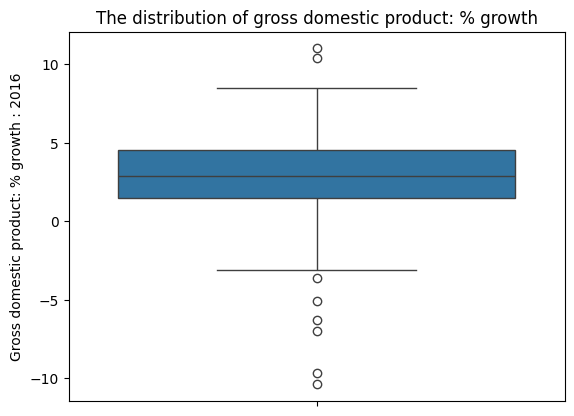

In [11]:
sns.boxplot(data=wb, y='Gross domestic product: % growth : 2016')
plt.title("The distribution of gross domestic product: % growth");

A violin plot display quartile information, albeit a bit more subtly. Look closely at the center vertical bar of the violin plot below!

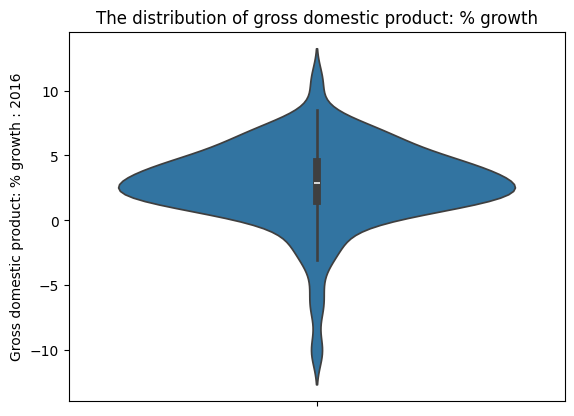

In [12]:
sns.violinplot(data=wb, y='Gross domestic product: % growth : 2016')
plt.title("The distribution of gross domestic product: % growth");

Plotting side-by-side box or violin plots allows us to compare distributions across different categories. These visualizations enable us to plot both a qualitative variable and a quantitative continuous variable in one chart.

Seaborn makes it easy to create side-by-side plots by specifying both an `x` and `y` column.

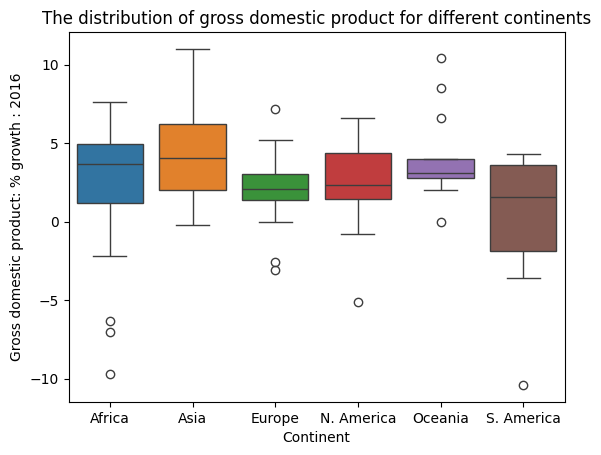

In [13]:
sns.boxplot(data=wb, x="Continent", y='Gross domestic product: % growth : 2016', hue="Continent")
plt.title("The distribution of gross domestic product for different continents");

## Histograms

You are likely familiar with histograms from Data 8. A histogram collects continuous data into bins, then plots this binned data. Each bin reflects the density of datapoints with values that lie between the left and right ends of the bin.

Histograms are particularly useful for visualizing the distribution of a dataset. By grouping data into bins, histograms allow us to see the frequency of data points within specific ranges, making it easier to identify patterns, trends, and outliers.

For example, consider the distribution of Gross National Income per capita across different countries. By creating a histogram of GNI per capita, we can observe how income is distributed globally and identify any countries with exceptionally high or low incomes.

In the following sections, we will explore various ways to create and customize histograms using `matplotlib` and `seaborn`. We will also discuss how to interpret histograms and use them to gain insights into our data.

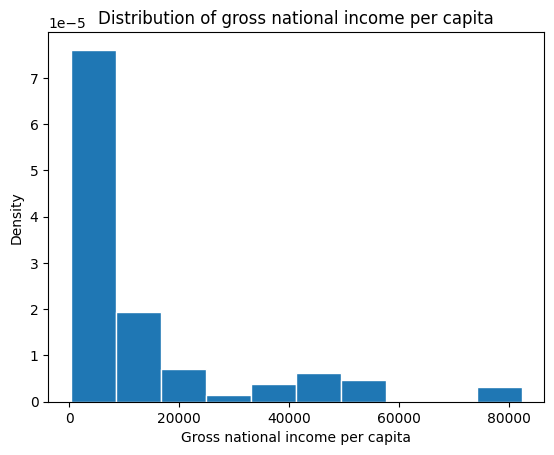

In [14]:
# The `edgecolor` argument controls the color of the bin edges
gni = wb["Gross national income per capita, Atlas method: $: 2016"]
plt.hist(gni, density=True, edgecolor="white")

# Add labels
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")
plt.title("Distribution of gross national income per capita");

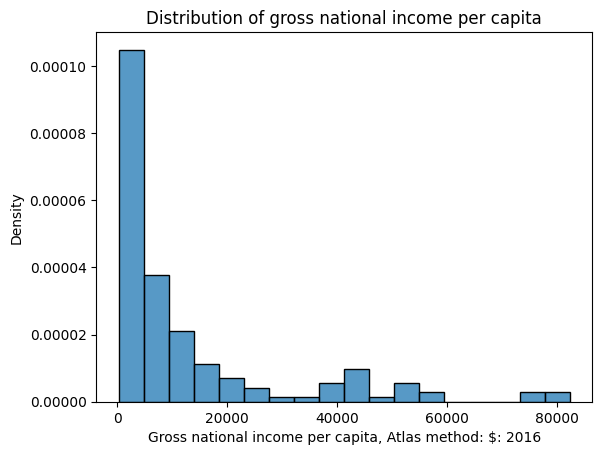

In [15]:
sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", stat="density")
plt.title("Distribution of gross national income per capita");

We can overlay histograms or density curves to compare distributions across qualitative categories.

The `hue` parameter in `sns.histplot` specifies the column used to determine the color of each category. This parameter can be used in many `seaborn` plotting functions.

Notice that the resulting plot includes a legend describing which color corresponds to each hemisphere. Including a legend is essential when color is used to encode information in a visualization.

In [107]:
# Create a new variable to store the hemisphere in which each country is located
north = ["Asia", "Europe", "N. America"]
south = ["Africa", "Oceania", "S. America"]
wb.loc[wb["Continent"].isin(north), "Hemisphere"] = "Northern"
wb.loc[wb["Continent"].isin(south), "Hemisphere"] = "Southern"

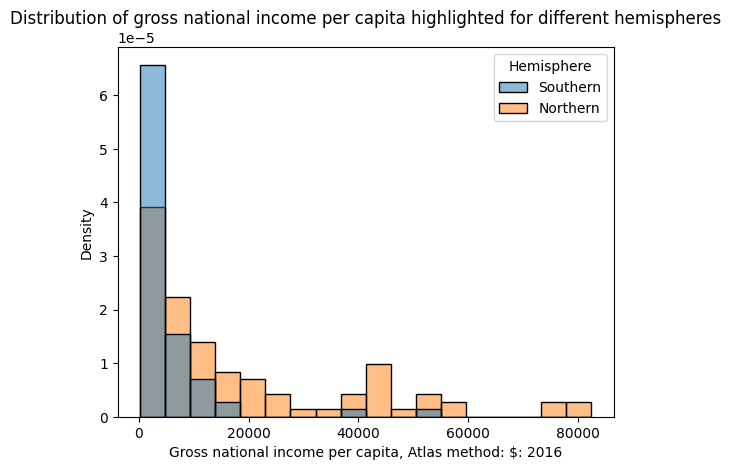

In [108]:
sns.histplot(data=wb, x="Gross national income per capita, Atlas method: $: 2016", hue="Hemisphere", stat="density")
plt.title("Distribution of gross national income per capita highlighted for different hemispheres");

Each bin of a histogram is scaled such that its area is equal to the percentage of all datapoints that it contains.

First bin has width 16410.0 and height 4.7741589911386953e-05
This corresponds to 16410.0 * 4.7741589911386953e-05 = 78.343949044586% of the data


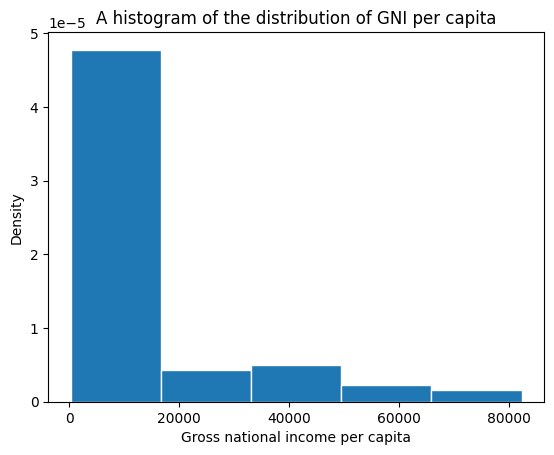

In [18]:
densities, bins, _ = plt.hist(gni, density=True, edgecolor="white", bins=5)
plt.xlabel("Gross national income per capita")
plt.ylabel("Density")
plt.title("A histogram of the distribution of GNI per capita");
print(f"First bin has width {bins[1]-bins[0]} and height {densities[0]}")
print(f"This corresponds to {bins[1]-bins[0]} * {densities[0]} = {(bins[1]-bins[0])*densities[0]*100}% of the data")

### Mode in Histograms

In Data 100, we describe a "mode" of a histogram as a peak in the distribution. However, determining what counts as a distinct "peak" can be challenging. For example, the number of peaks in the distribution of HIV rates across different countries varies depending on the number of histogram bins we use.

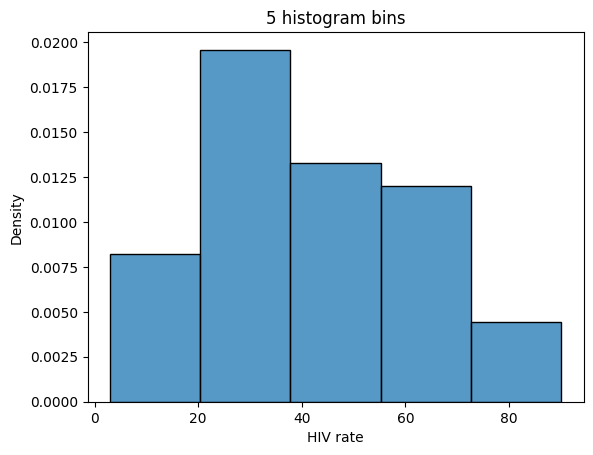

In [44]:
# Rename the very long column name for convenience
wb = wb.rename(columns={'Antiretroviral therapy coverage: % of people living with HIV: 2015':"HIV rate"})
# With 5 bins, it seems that there is only one peak
sns.histplot(data=wb, x="HIV rate", stat="density", bins=5)
plt.title("5 histogram bins");

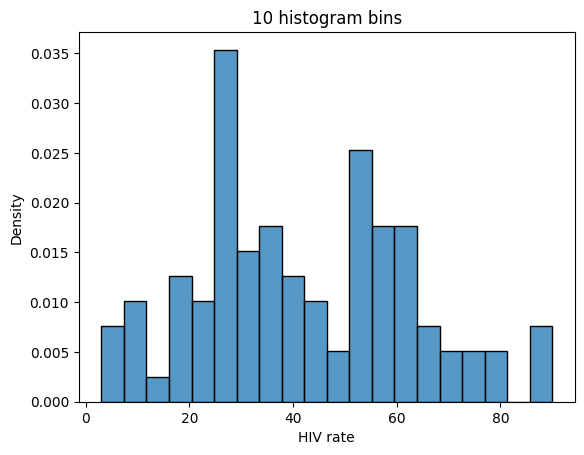

In [45]:
# With 10 bins, there seem to be two peaks

sns.histplot(data=wb, x="HIV rate", stat="density", bins=20)
plt.title("10 histogram bins");

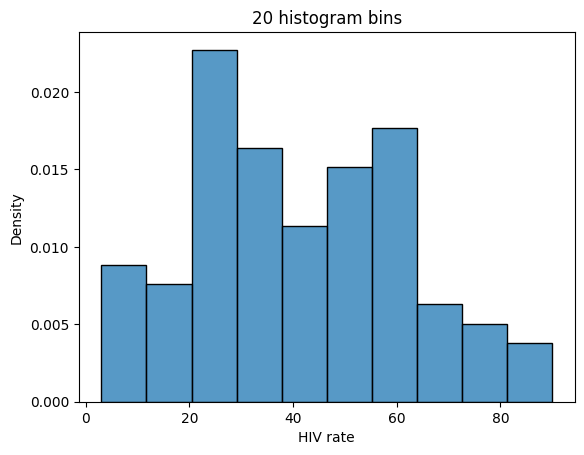

In [46]:
# And with 20 bins, it becomes hard to say what counts as a "peak"!

sns.histplot(data=wb, x ="HIV rate", stat="density", bins=10)
plt.title("20 histogram bins");

As this example illustrates, it is sometimes more useful to understand the general structure of our data, rather than focus on individual observations. Kernel density estimation helps with this goal.

## Kernel Density Estimation

Kernel density estimation (KDE) allows us to "smooth" a distribution to display general trends and eliminate noisy, distracting detail. This technique is particularly useful for visualizing the underlying structure of the data, especially when dealing with small datasets or when the data is noisy.

### How KDE Works

KDE works by placing a smooth, continuous kernel (such as a Gaussian) at each data point. These kernels are then summed to create a smooth estimate of the data's probability density function. The result is a curve that represents the data distribution more smoothly than a histogram.

### Steps to Construct a KDE

1. **Place a Kernel at Each Data Point**: Each data point is assigned a kernel function, which is typically a Gaussian (bell-shaped) curve.
2. **Normalize the Kernels**: Ensure that the area under each kernel is equal to 1, so that the total area under the KDE curve is also 1.
3. **Sum the Kernels**: Add up the contributions from all kernels to get the final KDE curve.


### KDE Formula

$$f_{\alpha}(x) = \sum_{i = 1}^n \frac{1}{n} \cdot K_{\alpha}(x, x_i) =  \frac{1}{n} \sum_{i = 1}^n K_{\alpha}(x, x_i)$$

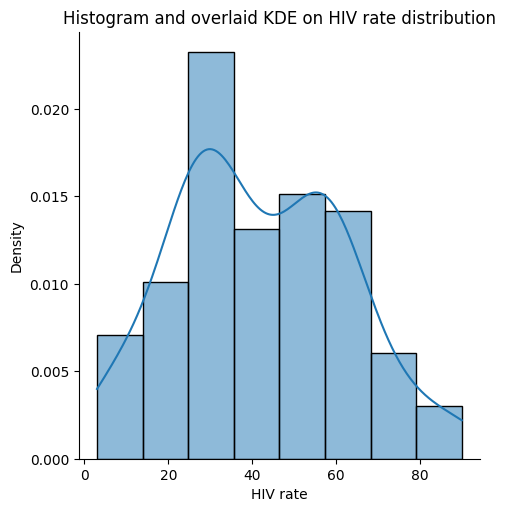

In [103]:
# The smooth curve overlaid on the histogram is a KDE
sns.displot(data=wb, x="HIV rate", kde=True, stat="density")
plt.title("Histogram and overlaid KDE on HIV rate distribution");

To illustrate the process of constructing a KDE curve, we'll use a fake dataset of just five datapoints, contained in the list `points`.

In [50]:
points = [2.2, 2.8, 3.7, 5.3, 5.7]

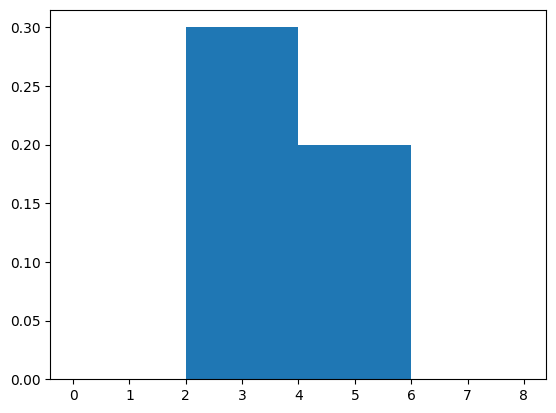

In [70]:
plt.hist(points, bins=range(0, 10, 2), ec='w', density=True);

Let's define some **kernels**. We will explain these formulas momentarily. We'll also define some helper functions for visualization purposes.

In [63]:
def gaussian(x, z, a):
    # Gaussian kernel
    return (1/np.sqrt(2*np.pi*a**2)) * np.exp((-(x - z)**2 / (2 * a**2)))

def boxcar_basic(x, z, a):
    # Boxcar kernel
    if np.abs(x - z) <= a/2:
        return 1/a
    return 0

def boxcar(x, z, a):
    # Boxcar kernel
    cond = np.abs(x - z)
    return np.piecewise(x, [cond <= a/2, cond > a/2], [1/a, 0] )

In [64]:
def create_kde(kernel, pts, a):
    # Takes in a kernel, set of points, and alpha
    # Returns the KDE as a function
    def f(x):
        output = 0
        for pt in pts:
            output += kernel(x, pt, a)
        return output / len(pts) # Normalization factor
    return f

def plot_kde(kernel, pts, a):
    # Calls create_kde and plots the corresponding KDE
    f = create_kde(kernel, pts, a)
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    y = [f(xi) for xi in x]
    fig, ax = plt.subplots()
    ax.plot(x, y)
    return fig, ax
    
def plot_separate_kernels(kernel, pts, a, norm=False):
    # Plots individual kernels, which are then summed to create the KDE
    fig, ax = plt.subplots()
    x = np.linspace(min(pts) - 5, max(pts) + 5, 1000)
    for pt in pts:
        y = kernel(x, pt, a)
        if norm:
            y /= len(pts)
        ax.plot(x, y)
    return fig, ax

Here are our five points represented as vertical bars.

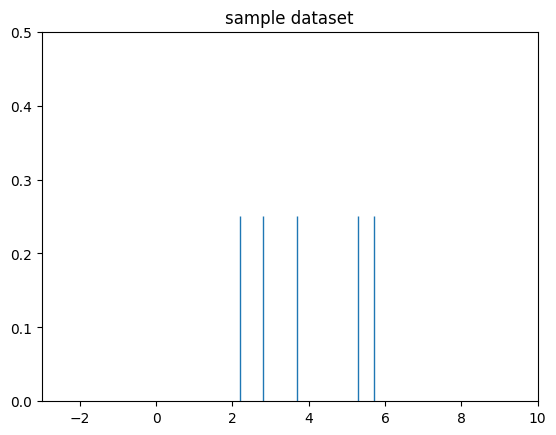

In [65]:
plt.xlim(-3, 10)
plt.ylim(0, 0.5)
sns.rugplot(points, height = 0.5)
plt.title("sample dataset");

### Step 1: Place a kernel at each point

We'll start with the Gaussian kernel.

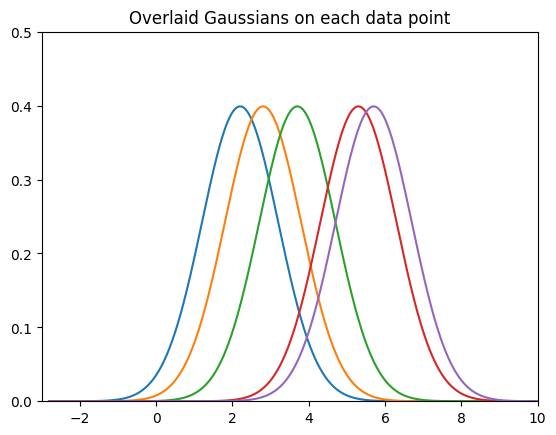

In [66]:
fig, ax = plot_separate_kernels(gaussian, points, a=1)
ax.set_title("Overlaid Gaussians on each data point")
ax.set_xlim(-3, 10)
ax.set_ylim(0, 0.5);

### Step 2: Normalize kernels so that total area is 1

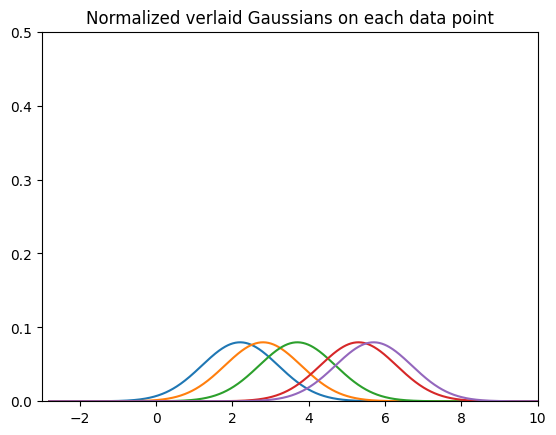

In [67]:
fig, ax = plot_separate_kernels(gaussian, points, a=1, norm=True)
ax.set_title("Normalized verlaid Gaussians on each data point")
ax.set_xlim(-3, 10)
ax.set_ylim(0, 0.5);

### Step 3: Sum all kernels together

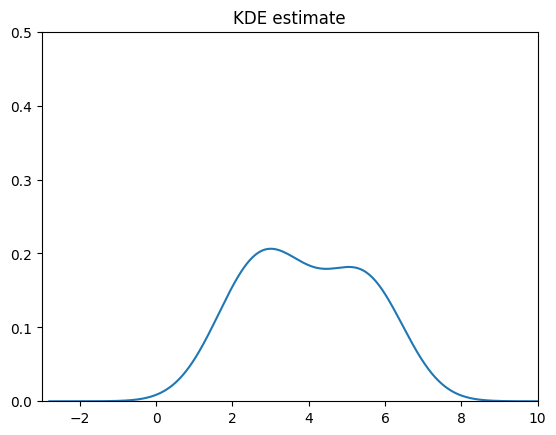

In [30]:
fig, ax = plot_kde(gaussian, points, a=1)
ax.set_title("KDE estimate")
ax.set_xlim(-3, 10)
ax.set_ylim(0, 0.5);

This looks identical to the smooth curve that `sns.distplot` gives us (when we set the appropriate parameter):

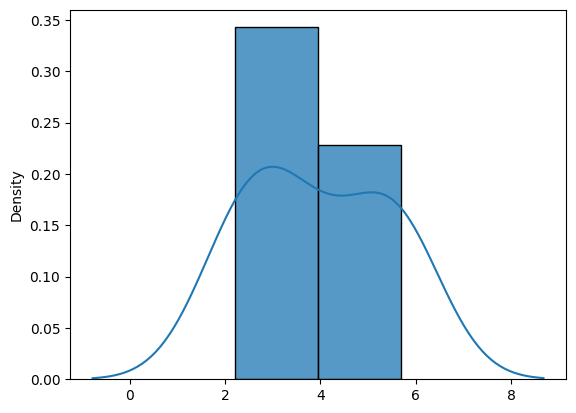

In [31]:
sns.kdeplot(points, bw_method=0.65)  # magic value!
sns.histplot(points, stat='density', bins=2);

You can also get a very similar result in a single call by requesting the KDE be added to the histogram, with `kde=True` and some extra keywords:

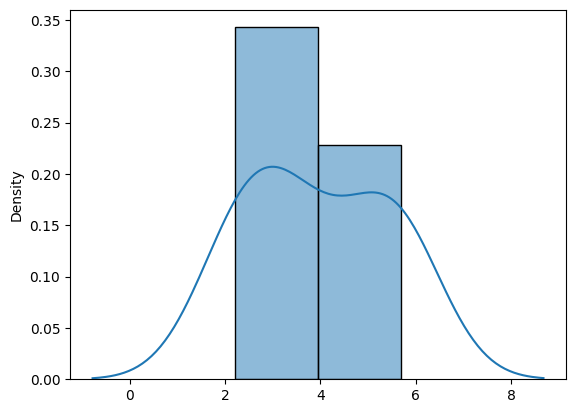

In [71]:
sns.histplot(points, bins=2, kde=True, stat='density', 
             kde_kws=dict(cut=3, bw_method=0.65));

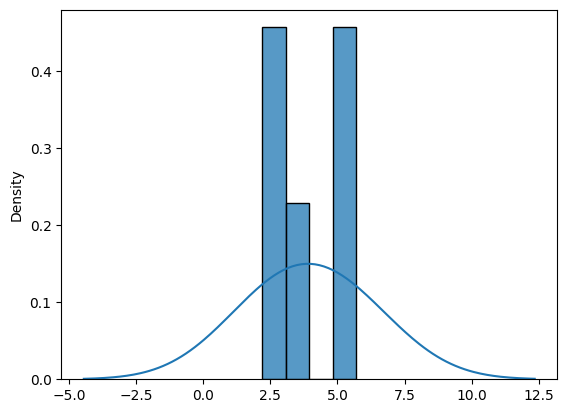

In [72]:
sns.kdeplot(points, bw_adjust=2)
sns.histplot(points, stat='density');

### Kernels

#### Gaussian

$$K_{\alpha}(x, x_i) = \frac{1}{\sqrt{2 \pi \alpha^2}} e^{-\frac{(x - x_i)^2}{2\alpha^2}}$$


#### Boxcar


$$K_{\alpha}(x, x_i) = \begin {cases}
			\frac{1}{\alpha}, \: \: \: |x - x_i| \leq \frac{\alpha}{2}\\
			0, \: \: \: \text{else}
			\end{cases}$$

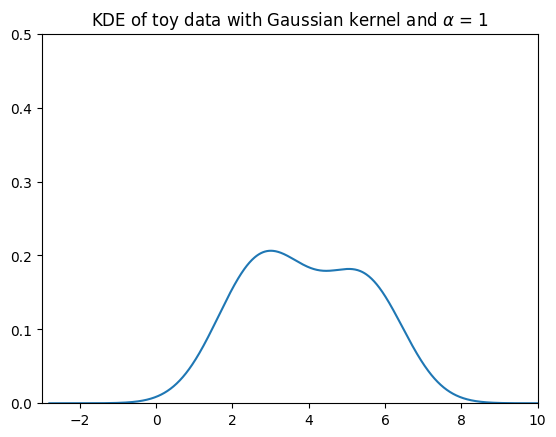

In [73]:
fig, ax = plot_kde(gaussian, points, a=1)
ax.set_title(r'KDE of toy data with Gaussian kernel and $\alpha$ = 1')
ax.set_xlim(-3, 10)
ax.set_ylim(0, 0.5);

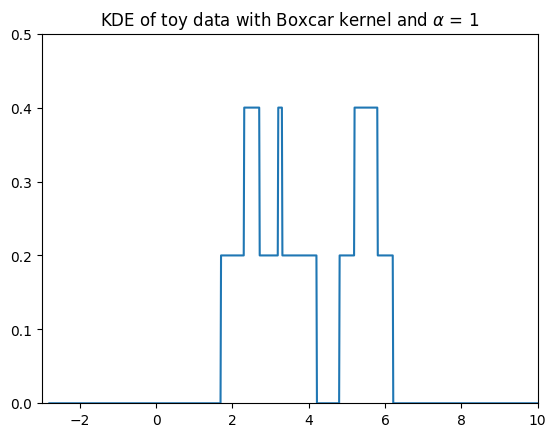

In [85]:
fig, ax = plot_kde(boxcar, points, a=1)
ax.set_title(r'KDE of toy data with Boxcar kernel and $\alpha$ = 1')
ax.set_xlim(-3, 10)
ax.set_ylim(0, 0.5);

### Effect of Bandwidth Hyperparameter $\alpha$

The bandwidth hyperparameter $\alpha$ plays a crucial role in KDE. It controls the smoothness of the resulting density curve. A smaller $\alpha$ results in a more detailed curve that closely follows the data points, while a larger $\alpha$ produces a smoother, more generalized curve.

Let's bring in some (different) toy data to illustrate the effect of varying $\alpha$ on the KDE.

In [86]:
tips = sns.load_dataset('tips')

In [76]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [77]:
vals = tips['total_bill']

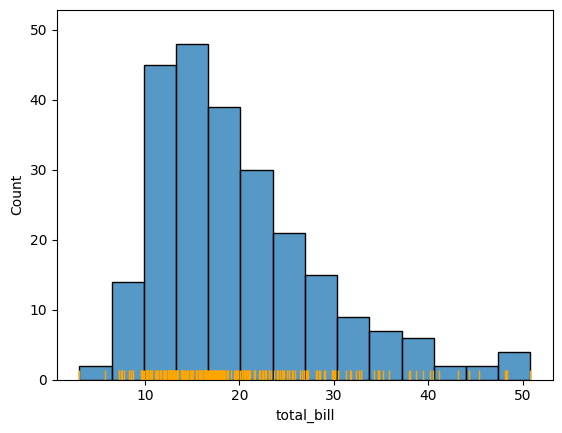

In [88]:
ax = sns.histplot(vals)
sns.rugplot(vals, color='orange', ax=ax);

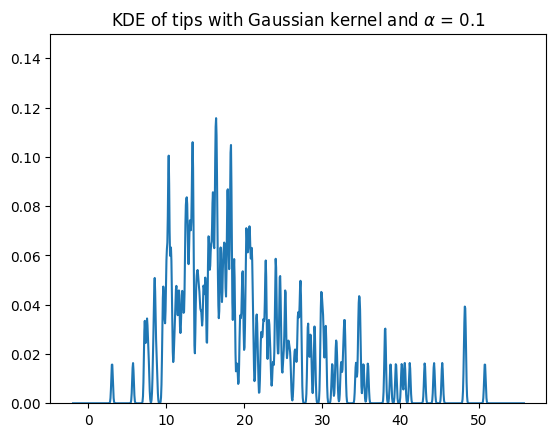

In [93]:
fig, ax = plot_kde(gaussian, vals, a=0.1)
ax.set_title(r'KDE of tips with Gaussian kernel and $\alpha$ = 0.1')
plt.ylim(0, 0.15);

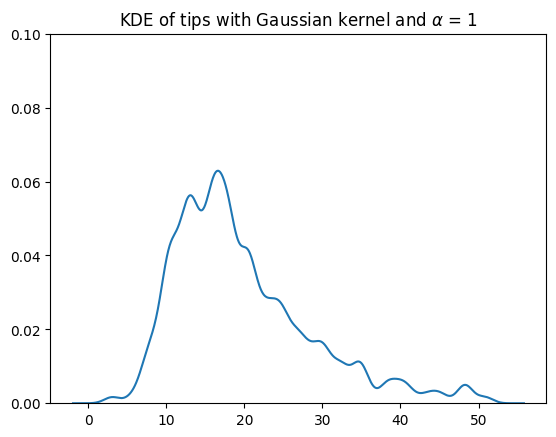

In [94]:
fig, ax = plot_kde(gaussian, vals, a=1)
ax.set_title(r'KDE of tips with Gaussian kernel and $\alpha$ = 1')
ax.set_ylim(0, 0.1);

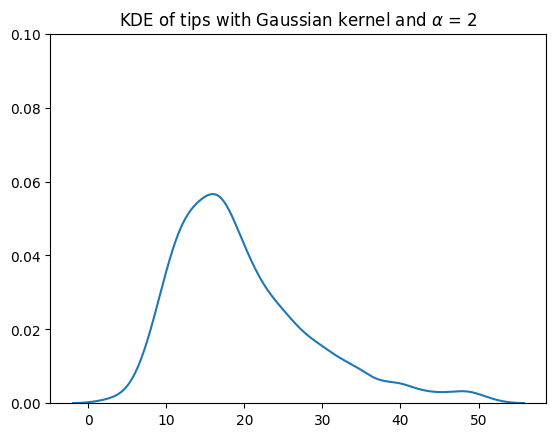

In [95]:
fig, ax = plot_kde(gaussian, vals, a=2)
ax.set_title(r'KDE of tips with Gaussian kernel and $\alpha$ = 2')
ax.set_ylim(0, 0.1);

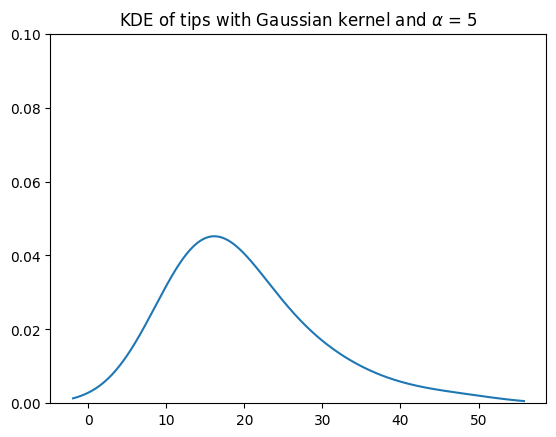

In [96]:
fig, ax = plot_kde(gaussian, vals, a=5)
ax.set_title(r'KDE of tips with Gaussian kernel and $\alpha$ = 5')
ax.set_ylim(0, 0.1);